In [12]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns


In [13]:
# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[ np.random.normal(5.4, size=n),
                    np.random.normal(5.8, size=n),
                    np.random.normal(6.4, size=n) ]



In [14]:
# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})
                                    


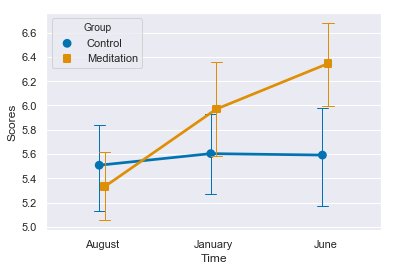

In [15]:
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')





In [16]:
df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean   std
Time    Group                 
August  Control     5.51  1.03
        Meditation  5.33  0.81
January Control     5.60  0.90
        Meditation  5.97  1.07
June    Control     5.59  1.18
        Meditation  6.35  0.93

In [17]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2  eps
-----------  -----  -----  -----  -----  -----  -------  -----  -----
Group        4.465      1     58  4.465  4.131    0.047  0.066  -
Time         9.359      2    116  4.679  4.940    0.009  0.078  0.998
Interaction  6.539      2    116  3.269  3.452    0.035  0.056  -



In [10]:
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T      dof  tail         p-unc    BF10    CLES    hedges
------------  -------  -------  ----------  --------  ------------  ------  -------  ---------  -------  ------  ------  --------
Time          -        August   January     True      True          -2.002   59.000  two-sided    0.050   0.908   0.598    -0.379
Time          -        August   June        True      True          -0.278   59.000  two-sided    0.782   0.147   0.513    -0.048
Time          -        January  June        True      True           1.773   59.000  two-sided    0.081   0.614   0.579     0.307
Group         -        Control  Meditation  False     True           0.122  178.000  two-sided    0.903   0.163   0.525     0.018
Time * Group  August   Control  Meditation  False     True           0.733   58.000  two-sided    0.466   0.329   0.573     0.187
Time * Group  January  Control  Meditation  False     True          -1.43

In [11]:
pg.pairwise_ttests(dv='Scores', within='Time', between='Group', subject='Subject',
                   data=df, padjust='holm')

,Contrast,Time,A,B,Paired,Parametric,T,dof,tail,p-unc,p-corr,p-adjust,BF10,CLES,hedges
0,Time,-,August,January,True,True,-2.002,59.0,two-sided,0.049846,0.149537,holm,0.908,0.598,-0.379
1,Time,-,August,June,True,True,-0.278,59.0,two-sided,0.782307,0.782307,holm,0.147,0.513,-0.048
2,Time,-,January,June,True,True,1.773,59.0,two-sided,0.081327,0.162653,holm,0.614,0.579,0.307
3,Group,-,Control,Meditation,False,True,0.122,178.0,two-sided,0.902960,NaN,NaN,0.163,0.525,0.018
4,Time * Group,August,Control,Meditation,False,True,0.733,58.0,two-sided,0.466222,0.747087,holm,0.329,0.573,0.187
5,Time * Group,January,Control,Meditation,False,True,-1.434,58.0,two-sided,0.157020,0.471060,holm,0.619,0.607,-0.365
6,Time * Group,June,Control,Meditation,False,True,0.897,58.0,two-sided,0.373544,0.747087,holm,0.368,0.608,0.229
